# Clustering

## Problem 1: Segment Customers

The problem that we are going to solve in this assignment is to segment customers into different groups based on their shopping trends.

In [1]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load data

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. **We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns.** The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [2]:
# load the data
shopping_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/shopping_data.csv')
shopping_data.rename(
    columns={
        'CustomerID': 'customer_id',
        'Genre': 'genre',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    },
    inplace=True
)
#display(shopping_data.head())

# TODO: retain only anual_income and spending_score for clustering
X = shopping_data[['annual_income', 'spending_score']]
display(X.head())

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Hierarchical Clustering
First, we will apply hierarchical clustering and use dendrogram to help find the number of clusters within the data.

**TODO: Use dendrogram to plot hierarchical clustering and find the number of clusters that makes sense.**

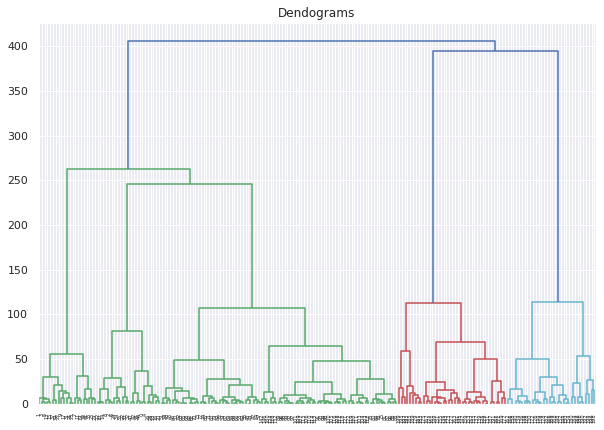

In [3]:
# TODO
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))  # dendrogram plot

There are **3 clusters** make sense according to the dendrogram in this step.

**TODO: Apply hierarchical clustering based on the number of clusters you pick from the dendrogram, and visualize the results using scatterplot.**

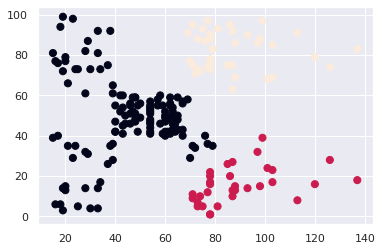

In [4]:
# Hierarchical clustering model prediction
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_ward = hc.fit_predict(X) 

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_ward, s=50)  

### K-means Clustering
Then, we will apply k-means to the same data and visualize the results.

**TODO: Vary the number of K from 2 to 10 and plot the Sum of Squared Error (SSE) as K increases and pick up the value of K that makes sense.**


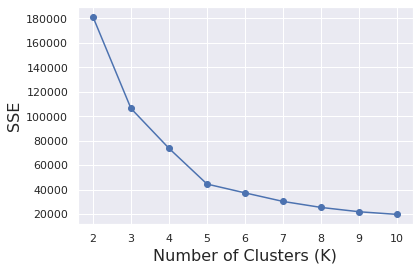

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# calculate SSE for each k（2-10）
sse = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k)
  km = kmeans.fit(X)
  sse.append(km.inertia_)

# Plot how k value affect SSE
plt.plot(range(2,11),sse,marker="o")
plt.xlabel("Number of Clusters (K)",size=16)
plt.ylabel("SSE",size=16)
plt.show()

According to the elbow method & SSE plot, when k = 5, the SSE decrease trend begins to slow down significantly. In this way, k=5 should be the best value. 

**TODO: Cluster the data using K-means based on the pre-defined value of K from the previous step and and visualize the results using scatterplot.**

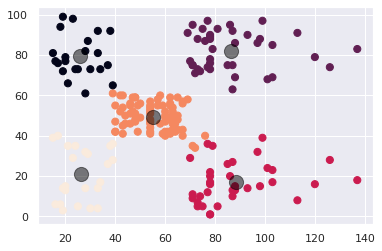

In [6]:
# Kmeans model for the best K
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# plot scatters according to the best k value
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50)  

# plot the centers for each cluster
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)   # plot central points

## Problem 2: Clustering (Manually)

For the following dataset, perform the clustering “by hand”:

17 28 50 60 80 89 150 167 171 189 
1. 	Use the K-means algorithm with K= 3 to cluster the data

In [7]:
# Data preparation
Y = np.array([17, 28, 50, 60, 80, 89, 150, 167, 171, 189])
Y = Y.reshape(-1, 1)

# K-Means training
kmeans = KMeans(n_clusters=4)
kmeans.fit(Y)
y_kmeans = kmeans.predict(Y)

# test results
print(y_kmeans) 

[2 2 0 0 3 3 1 1 1 1]


2. 	Use hierarchical agglomerative clustering with single linkage to cluster the data

In [8]:
from sklearn.cluster import AgglomerativeClustering
hac_single = AgglomerativeClustering(linkage='single').fit(Y)

print(hac_single.labels_)

[0 0 0 0 0 0 1 1 1 1]


3. 	Use hierarchical agglomerative clustering with complete linkage to cluster the data

In [9]:
hac_complete = AgglomerativeClustering(linkage='complete').fit(Y)

print(hac_complete.labels_)

[0 0 0 0 0 0 1 1 1 1]


4. 	For K-means What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189

In [10]:
kmeans3 = KMeans(init = np.array([[150],[171],[189]]), n_init=1, n_clusters=3, max_iter=3).fit(Y)
y_kmeans3 = kmeans3.predict(Y)

# test results
print(y_kmeans3) 

[0 0 0 0 0 0 1 1 1 2]


## Bonus points
Use the dataset of accepted papers at the AAAI 2014 conference to find clusters of papers using K-Means. You can use paper title or abstract to build your features using [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model).

1. Vary the number of K from 2 to 6 and show if the results vary and assess the clusters obtained.

2. Make a case regarding which clusters ‘make sense’ e.g., is there a cluster were papers on reinforcement learning are together vs. another cluster which has papers on deep learning.

In [95]:
# Load the Relevant libraries
import sklearn as sk
import re

# Load Data and select feature data
aaai_data = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/AAAI2014AcceptedPapers.csv")
X = aaai_data['title']   # select TITLE as a feature

**1. Implementation of Bag of Words algorithm**

In [99]:
# Functions for Bag of Words Model
# 1 - split sentence into distinct words
def splitword(doc):
  doc = re.sub(r"[^a-zA-Z]", " ", doc.lower()).split()
  stop_words = ['the', 'of', 'and', 'in', 'to', 'a', 'is', 'that', 'by', 'as', 'aaai','very', 'will', 'with', 'without', 'you','your','via', 'when', 'where', 'who', 'why']
  clean_doc = []
  for d in doc:
    if d not in stop_words:
      clean_doc.append(d)
  return clean_doc

# 2 - combine 
def combinewords(doc1, doc2):
  tmp = np.union1d(doc1,doc2)
  return tmp

# 3 - Bag of Words Implementation function
def BoW(wordset,doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in doc:
      tf_diz[word]=doc.count(word)
  return tf_diz

In [100]:
temp = [0] * len(X)   # use temp to record list composed of words (str -> list)
for i in range(len(X)):
  X[i] = splitword(str(X[i]))
  temp[i] = X[i]    

for i in range(len(X)-1):
  X[i+1] = combinewords(X[i], X[i+1]) 
wordset = X[i]

df_bow = pd.DataFrame(BoW(wordset, s) for s in temp)
df_bow

,abduction,abox,absorbing,accurate,achieving,acoustic,acquiring,action,actions,active,activities,adaptation,adaptive,adjustment,advice,advisors,aerosol,affect,against,agenda,agent,agents,ai,air,algorithm,algorithms,alignment,allocation,almost,also,altering,alzheimer,an,analysis,analyzer,anonymity,answering,anytime,application,applications,...,users,using,utility,v,validation,value,valued,values,variable,variance,variation,vcg,vector,vehicle,vehicles,vertex,video,videos,view,visual,visualization,voted,walking,way,weakening,weakly,web,weighted,whole,wide,wikipedia,wild,winner,winners,wisdom,word,world,wormhole,worst,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
394,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
395,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
396,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


Up to here, we completed the Bag of Words' implementation. And now we get a huge dataframe, showing the frequency of each word included among the whole wordset.

**2. Clustering based on KMeans with the dataframe generated from the BoW algorithm.**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1

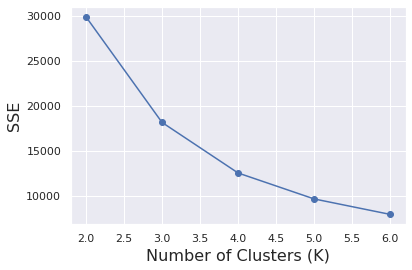

In [101]:
# calculate SSE for each k（2-10）
sse = []
for k in range(2,7):
  kmeans = KMeans(n_clusters=k)
  km = kmeans.fit(df_bow)
  sse.append(km.inertia_)

# Plot how k value affect SSE
plt.plot(range(2,7),sse,marker="o")
plt.xlabel("Number of Clusters (K)",size=16)
plt.ylabel("SSE",size=16)
plt.show()

The clustering results and SSE keep changing with K value. According to the K value iteration attempts, k=4 should be the best cluster number among 2~6.

**3. Case for clustering.**

In this project, I consider the top frequency keywords would largely represent cluster features in some degree. For each cluster, I rebuild the word dictionaries, and find out the top 5 keywords in each cluster.

In [102]:
from heapq import nlargest

y_kmeans = KMeans(n_clusters=4).fit(df_bow).predict(df_bow)
#print(y_kmeans)

# Rebuild new dictionaries based on the clustering result
for i in range(len(temp)):
  if y_kmeans[i] == 0:
    dict0 = BoW(wordset, temp[i])
  if y_kmeans[i] == 1:
    dict1 = BoW(wordset, temp[i])
  if y_kmeans[i] == 2:
    dict2 = BoW(wordset, temp[i])
  if y_kmeans[i] == 3:
    dict3 = BoW(wordset, temp[i])

#Function for most popular words in each cluster
def topn_dict(d, n):
    return nlargest(n, d, key=lambda k: d[k])

print('Cluster0: ', topn_dict(dict0, 5))
print('Cluster1: ', topn_dict(dict1, 5))
print('Cluster2: ', topn_dict(dict2, 5))
print('Cluster3: ', topn_dict(dict3, 5))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


Cluster0:  ['abduction', 'abox', 'accurate', 'acoustic', 'action']
Cluster1:  ['abduction', 'abox', 'absorbing', 'wormhole', 'worst']
Cluster2:  ['accurate', 'acoustic', 'action', 'active', 'adaptive']
Cluster3:  ['abduction', 'abox', 'absorbing', 'accurate', 'achieving']


Commonly, accepted papers of AAAI 2014 are significantly popular with *'abduction', 'abox','accurate'*. While each cluster has its biases:

cluster 0 seems focus more on *'acoustic', 'action'*

cluster 1 seems focus more on *'wormhole', 'worst'*

cluster 2 seems focus more on *'acoustic', 'action', 'active', 'adaptive'*

cluster 3 seems focus more on *'absorbing', 'achieving'*

In this way, the clustering makes sense.